In [8]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
data = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
(x_train, y_train), (x_test, y_test) = data

Output of the first image from the dataset

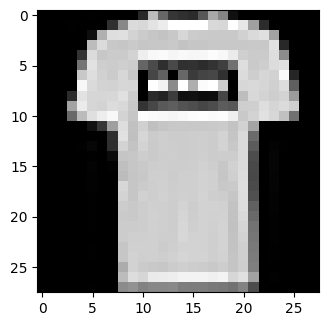

In [6]:
plt.figure(figsize=[8,8])
plt.subplot(1,2,1)
plt.imshow(x_train[1,:,:], cmap='gray')
plt.show()

In [32]:
unique_labels = np.unique(y_train)

num_classes = len(unique_labels)

print('Total number of classes : ', num_classes)
print('Unique labels : ', unique_labels)

Total number of classes :  10
Unique labels :  [0 1 2 3 4 5 6 7 8 9]


### Creating a neural network models

NN Classifier with Dense layers

In [44]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop

BATCH_SIZE = 32
EPOCHS = 25

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', ))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=1e-4), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/25
1875/1875 [==============================] - 55s 22ms/step - loss: 0.5000 - accuracy: 0.8243 - val_loss: 0.4210 - val_accuracy: 0.8516
Epoch 2/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3725 - accuracy: 0.8671 - val_loss: 0.3685 - val_accuracy: 0.8696
Epoch 3/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3348 - accuracy: 0.8796 - val_loss: 0.3835 - val_accuracy: 0.8661
Epoch 4/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3106 - accuracy: 0.8887 - val_loss: 0.3796 - val_accuracy: 0.8703
Epoch 5/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2938 - accuracy: 0.8940 - val_loss: 0.3559 - val_accuracy: 0.8793
Epoch 6/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2798 - accuracy: 0.9003 - val_loss: 0.3354 - val_accuracy: 0.8865
Epoch 7/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2689 - accuracy: 0.9050 - val_loss: 0.3618 -

NN Classifier with Conv2D and MaxPooling2D layers

In [9]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

BATCH_SIZE = 64
EPOCHS = 20

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])


Epoch 1/20
938/938 [==============================] - 48s 49ms/step - loss: 0.5172 - accuracy: 0.8114 - val_loss: 0.3879 - val_accuracy: 0.8566
Epoch 2/20
938/938 [==============================] - 42s 45ms/step - loss: 0.3348 - accuracy: 0.8791 - val_loss: 0.3191 - val_accuracy: 0.8860
Epoch 3/20
938/938 [==============================] - 41s 44ms/step - loss: 0.2912 - accuracy: 0.8933 - val_loss: 0.2920 - val_accuracy: 0.8946
Epoch 4/20
938/938 [==============================] - 42s 45ms/step - loss: 0.2580 - accuracy: 0.9038 - val_loss: 0.2785 - val_accuracy: 0.8967
Epoch 5/20
938/938 [==============================] - 43s 46ms/step - loss: 0.2346 - accuracy: 0.9139 - val_loss: 0.2634 - val_accuracy: 0.9026
Epoch 6/20
938/938 [==============================] - 48s 51ms/step - loss: 0.2157 - accuracy: 0.9194 - val_loss: 0.2556 - val_accuracy: 0.9094
Epoch 7/20
938/938 [==============================] - 41s 44ms/step - loss: 0.1970 - accuracy: 0.9269 - val_loss: 0.2516 - val_accuracy:

#### Conclusion
Today we have created a neural network for classifying images from the fashion mnist dataset. We used dense layers and layers that are used in creating CNN. The result was quite good. In the first case, we got 89% accuracy on the test data, and the accuracy of the second neural network was 91.3%.